In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [6]:
sh_raw = pd.read_csv('C:\superhero\superhero-movie-dataset-1978-2012.csv',
    header=None,
    names=['Year','Title','Comic','IMDB','RT','CompositeRating','OpeningWeekendBoxOffice',
    'AvgTicketPriceThatYear','EstdOpeningAttendance','USPopThatYear'])
sh_raw.head(5)

,Year,Title,Comic,IMDB,RT,CompositeRating,OpeningWeekendBoxOffice,AvgTicketPriceThatYear,EstdOpeningAttendance,USPopThatYear
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902


In [7]:
sh = sh_raw[np.isfinite(sh_raw.OpeningWeekendBoxOffice)]
sh.head(5)

,Year,Title,Comic,IMDB,RT,CompositeRating,OpeningWeekendBoxOffice,AvgTicketPriceThatYear,EstdOpeningAttendance,USPopThatYear
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1366613.477,240132887


In [8]:
# Normalize the scores
imdb_normalized = sh.IMDB / 10   # IMDB scores out of 10
sh.insert(9,'IMDBNormalized', imdb_normalized)
rt_normalized = sh.RT/100        # RT scores out of 100
sh.insert(9, 'RTNormalized', rt_normalized)


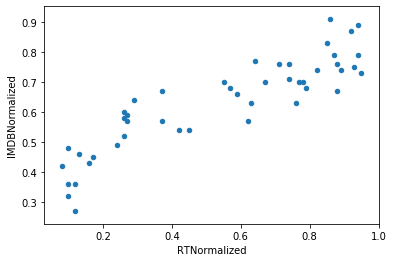

In [9]:
sh.plot.scatter(x = 'RTNormalized' , y='IMDBNormalized')

In [10]:
sh[['RTNormalized' , 'IMDBNormalized']].corr()

,RTNormalized,IMDBNormalized
RTNormalized,1.00000,0.88836
IMDBNormalized,0.88836,1.00000


In [11]:
sh[['RTNormalized' , 'IMDBNormalized']].describe()

,RTNormalized,IMDBNormalized
count,46.000000,46.000000
mean,0.539783,0.630000
std,0.302129,0.152898
min,0.080000,0.270000
25%,0.260000,0.540000
50%,0.605000,0.665000
75%,0.812500,0.740000
max,0.950000,0.910000


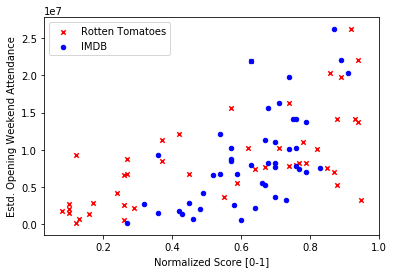

In [12]:
plt = sh.plot.scatter(x='RTNormalized',y='EstdOpeningAttendance', marker='x', color='Red', label='Rotten Tomatoes')
plt = sh.plot.scatter(x='IMDBNormalized',y='EstdOpeningAttendance', marker='o', ax=plt, color='Blue', label='IMDB')
plt.set_xlabel("Normalized Score [0-1]")
plt.set_ylabel("Estd. Opening Weekend Attendance")
plt

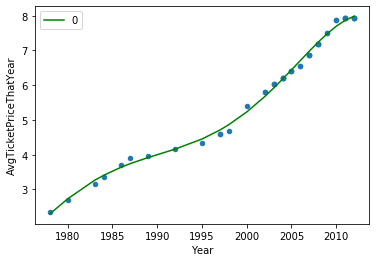

In [13]:
plt = sh.plot.scatter(x = 'Year', y='AvgTicketPriceThatYear')
z = np.polyfit(x=sh.Year,y=sh.AvgTicketPriceThatYear, deg=5)
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(sh.Year), index=sh.Year)
trendline.plot.line(ax=plt, color='Green')